# **Adidas Sales Analysis**

## 🗂️ Project Overview
The Adidas Sales Analysis project leverages robust data visualization and collaborative analysis tools to optimize sales strategies and enhance overall performance. This project identifies key sales drivers, geographic performance trends, and product-specific insights, enabling the Adidas team to make informed decisions about pricing, inventory, and marketing.

## 🎯 Objectives

1. **Enhanced Understanding of Sales Dynamics**: Analyze sales trends and identify key performance drivers across various regions, products, and sales methods.
2. **Geographic Sales Potential:** Detect regions with high and low sales potential to enable strategic regional focus and resource allocation.
3. **Product Performance Insights:** Evaluate product-specific performance metrics to inform inventory management and marketing strategies.
4. **Informed Pricing and Margin Strategies:** Develop data-backed pricing strategies and optimize operating margins for improved profitability.
5. **Actionable Recommendations:** Provide clear, data-driven recommendations to optimize sales and profitability across multiple business dimensions.

## 📊 Data Description
Metrics
- Total Sales: Total revenue generated from product sales.
- Operating Profit: Profit calculated as the difference between Total Sales and operating expenses.
- Units Sold: Total number of product units sold.
- Price per Unit: Selling price of each product unit.
- Operating Margin: The ratio of Operating Profit to Total Sales, indicating profitability.

Dimensions
- Retailer: Name of the retailer responsible for the transaction.
- Product: Name and category of the product sold (e.g., Men's Footwear, Women's Apparel).
- Region: Geographic region of the transaction (e.g., Northeast, Midwest).
- State: U.S. state where the transaction occurred.
- City: City where the transaction took place.
- Invoice Date: Date of the sales transaction.
- Sales Method: Sales channel used (e.g., In-store, Online).

This breakdown of metrics and dimensions provides a structured approach for analyzing sales trends and profitability while supporting strategic business decisions.

# 🌟Business Insight Overview

# Recommendations & Next Steps

# Data Wrangling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/project3/Adidas US Sales Datasets.xlsx"
df = pd.read_excel(file_path)
df.shape

(9648, 13)

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# Assesing the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
pd.isnull(df).sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [6]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# Exploratory Data Analysis

# Visualization & Explanatory Analysis

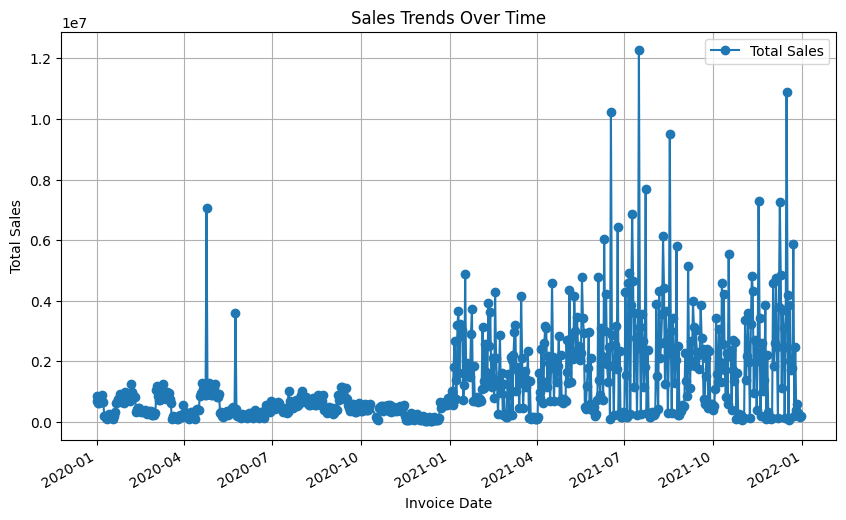

In [7]:
# 1. Sales Trends Over Time
plt.figure(figsize=(10, 6))
df.groupby('Invoice Date')['Total Sales'].sum().plot(marker='o', label='Total Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

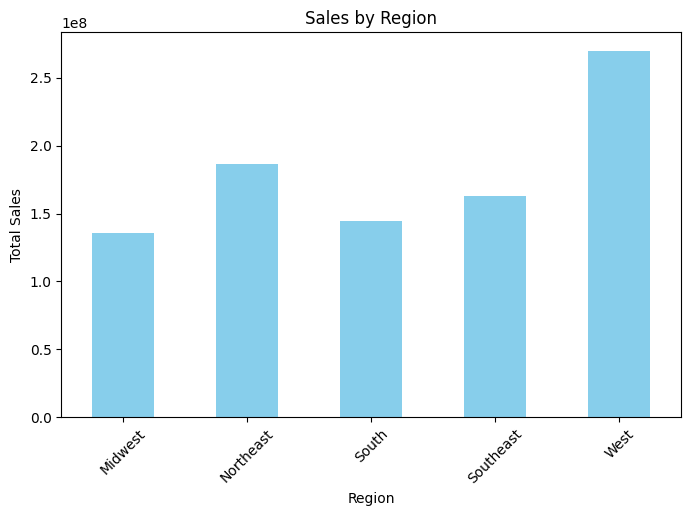

In [8]:
# 2. Sales by Region (Here, only Northeast data is available)
sales_by_region = df.groupby('Region')["Total Sales"].sum()
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

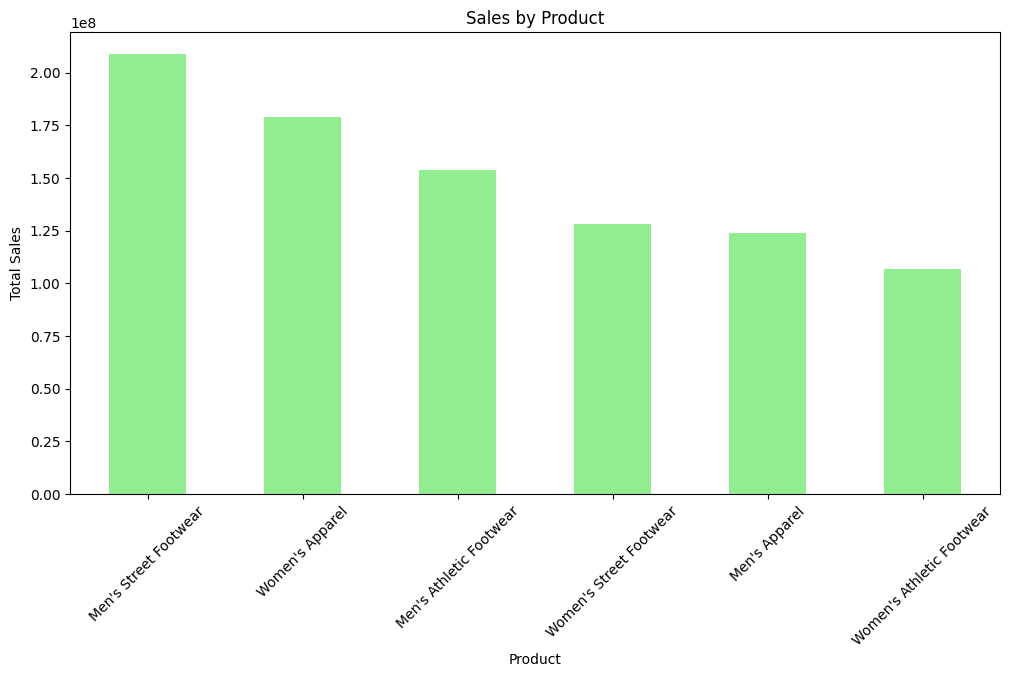

In [9]:
# 3. Product Performance Analysis
product_sales = df.groupby('Product')["Total Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

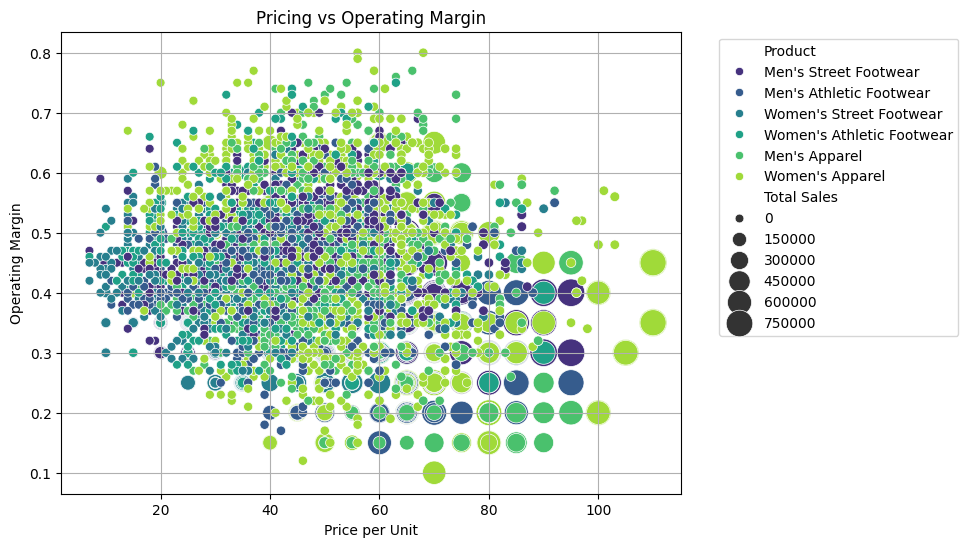

In [10]:
# 4. Pricing vs Operating Margin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price per Unit', y='Operating Margin', size='Total Sales', hue='Product', data=df, palette='viridis', sizes=(40, 400))
plt.title('Pricing vs Operating Margin')
plt.xlabel('Price per Unit')
plt.ylabel('Operating Margin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


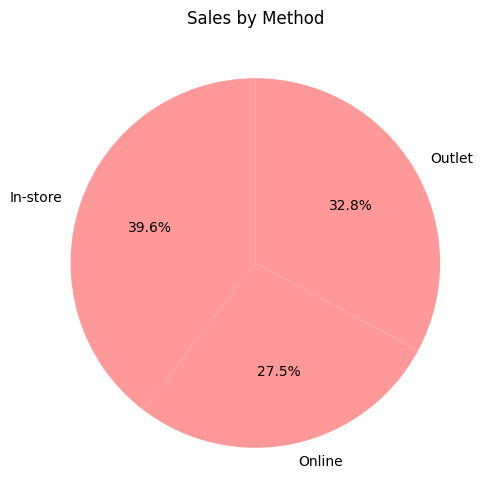

In [11]:
# 5. Sales Methods (Here, only In-store data is available)
sales_by_method = df.groupby('Sales Method')["Total Sales"].sum()
plt.figure(figsize=(6, 6))
sales_by_method.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999'])
plt.title('Sales by Method')
plt.ylabel('')
plt.show()


In [12]:
# Summary Statistics
summary = df.groupby('Product').agg(
    Total_Sales=('Total Sales', 'sum'),
    Avg_Price=('Price per Unit', 'mean'),
    Avg_Margin=('Operating Margin', 'mean'),
    Units_Sold=('Units Sold', 'sum'),
)
print("Summary Statistics by Product:")
print(summary)


Summary Statistics by Product:
                           Total_Sales  Avg_Price  Avg_Margin  Units_Sold
Product                                                                  
Men's Apparel              123728632.0  50.321918    0.413225      306683
Men's Athletic Footwear    153673680.0  43.779503    0.402702      435526
Men's Street Footwear      208826244.0  44.236646    0.446130      593320
Women's Apparel            179038860.0  51.600746    0.441318      433827
Women's Athletic Footwear  106631896.0  41.112702    0.424359      317236
Women's Street Footwear    128002813.0  40.252488    0.410199      392269
